In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

## Projecting a vector on a (random) k-dimensional subspace preserves length

Given a vector $u \in \mathbb{R}^d$, we want to project it on a given $k$ dimensional space that is spanned by vector $v_1,\ldots,v_k$. Without any loss of generality, we may assume that this set of vectors are orthonormal, namely they are pairwise orthogonal and their norm is 1, i.e., $v_i^Tv_j=\delta_{ij}$ where $\delta_{ij}=1$ if $i=j$, otherwise $\delta_{ij}= 0$.  

Let's define $u'$ to be the projection of a vector $u$ on a vector $v$ of unit length. Clearly, $u'=\lambda v$ for some real value $\lambda$.  How can we find $\lambda$? 


<img src="figs/projection.png" width="100">

We know that $\lambda v + x = u$ and $x$ is orthogonal to $v$. In other words $v^T(u-\lambda v)=0 \rightarrow v^Tu - \lambda v^T v = 0 \rightarrow  \lambda  = v^T u$. Thus, the projection is $u'= (u^T v) v$. When we project u simultaneously to $v_1, \ldots, v_k$ the coefficients are $u^T v_i$ along each $v_i$. This can be expressed as a matrix-vector multiplication $Ru$ where $R$ is a $k \times dim$ matrix, with one row for each $v_i$.  


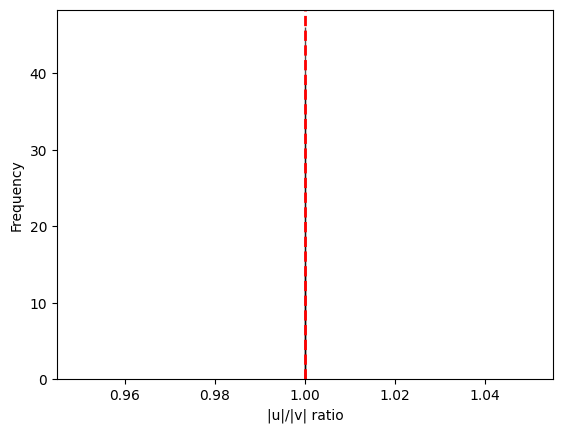

[0.9999999999999999, 1.0, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0000000000000002, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0000000000000002, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0000000000000002, 0.9999999999999999, 1.0, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0000000000000002, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0000000000000002, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 1.0000000000000002, 1.0, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 0.9999999999999999, 1.0, 1.0, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0, 0.99

In [2]:
def generate_random_orthonormal_matrix(k: int, d: int) -> np.array: 
    random_matrix = np.random.randn(d, k)
    Q, R = np.linalg.qr(random_matrix)
    Q = np.dot(Q, np.diag(np.sign(np.diag(R))))
    return Q.T

def random_orthonormal_project_vector(u: np.array, k: int) -> np.array:
    R = generate_random_orthonormal_matrix(k, len(u))  
    return np.sqrt(len(u) / k) * R @ u

def experiment1(u, k, T=100):
    res = [np.linalg.norm(u) / np.linalg.norm(random_orthonormal_project_vector(u, k)) for _ in range(T)]
    plt.hist(res, bins=5, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(1, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.xlabel('|u|/|v| ratio')
    plt.ylabel('Frequency')
    plt.show()
    return res 

res = experiment1(np.ones(1000), 1000)
print(res)

#### Exercise  

Prove that $\mathbb{E}[||v||^2] = ||u||^2 $




# Random matrix generation 

In [82]:
def generate_random_orthonormal_matrix(k: int, d: int) -> np.array: 
    uniform_random_matrix = np.random.rand(d, k)
    normal_random_matrix = np.random.rand(d, k)
    q1, _ = np.linalg.qr(uniform_random_matrix)
    q2, _ = np.linalg.qr(normal_random_matrix)
    return q1.T, q2.T, uniform_random_matrix.T, normal_random_matrix.T

In [90]:
a, b, c, d = generate_random_orthonormal_matrix(2,5) 
a.shape

(2, 5)

In [96]:
def check_matrix(a: np.array):
    (n, d) = a.shape
    x = np.zeros([n,n])
    for i in range(n) : 
        x[i,i] = np.linalg.norm(a[i,:])
        
    for i in range(n):
        for j in range(i+1,n):
            x[i,j] = np.dot(a[i,:], a[j,:])
            if x[i,j] < 1e-5:
                x[i,j] = 0 
    
    print(x)
            
for a in generate_random_orthonormal_matrix(2,5) :            
    check_matrix(a)

[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]
[[0.96671419 0.93452556]
 [0.         1.14087572]]
[[1.39122884 1.52311965]
 [0.         1.46181797]]


# Random Projection 

In [3]:
class DistortionParam:
    def __init__(self, value=0.1):
        if not (0 < value < 1):
            raise ValueError("Value must be in the interval (0, 1)")
        self.value = value
        
        
def random_projection(cloud_of_points: np.array, distortion : DistortionParam): 
    (n, d) = cloud_of_points.shape 
    ϵ = distortion.value 
    k = 9*log(n)/(ϵ*ϵ)
    
    return 0 

In [4]:
cloud_of_points = np.array([[1,2,3],
                            [3,4,5]])

# Extra, Optional Material: Maximum cut  


Before we show the Goemans-Williamson approximation algorithm for Max cut 
*Exercise* : Prove that the maximum cut problem is NP-complete

In [103]:
def max_cut_ilp_solver(graph):
    # Create a PuLP ILP problem
    max_cut_problem = pulp.LpProblem("MaxCutProblem", pulp.LpMaximize)
    
    # Binary variables to represent the cut (1 if the node is in one set, 0 otherwise)
    nodes = list(graph.nodes())
    x = pulp.LpVariable.dicts("x", nodes, 0, 1, pulp.LpBinary)
    
    # Binary variables to represent the edges of the cut
    edges = list(graph.edges())
    y = pulp.LpVariable.dicts("y", edges, 0, 1, pulp.LpBinary)
    
    # Maximize the cut value (sum of edge weights crossing the cut)
    max_cut_problem += pulp.lpSum(graph[u][v]['weight'] * y[(u, v)] for (u, v) in edges), "MaximizeCut"
    
    # Add constraints y_uv <= x_u + x_v
    for (u, v) in edges:
        max_cut_problem += y[(u, v)] <= x[u] + x[v], f"Constraint_y_{u}_{v}_1"
    
    # Add constraints y_uv <= 2 - x_u - x_v
    for (u, v) in edges:
        max_cut_problem += y[(u, v)] <= 2 - x[u] - x[v], f"Constraint_y_{u}_{v}_2"
    
    # Solve the ILP problem
    max_cut_problem.solve()
    
    # Extract the results
    max_cut_value = pulp.value(max_cut_problem.objective)
    max_cut_set1 = [node for node in nodes if pulp.value(x[node]) == 1]
    max_cut_set2 = [node for node in nodes if pulp.value(x[node]) == 0]
    
    return max_cut_value, max_cut_set1, max_cut_set2

G = nx.Graph()
G.add_edge(0, 1, weight=10)
G.add_edge(0, 2, weight=2)
G.add_edge(1, 2, weight=3)
G.add_edge(1, 3, weight=4)
G.add_edge(2, 3, weight=5)

max_cut_value, max_cut_set1, max_cut_set2 = max_cut_ilp_solver(G)
print("Max Cut Value:", max_cut_value)
print("Set 1:", max_cut_set1)
print("Set 2:", max_cut_set2)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/sr/hg005qrx2fx6l35d054k7k9h0000gn/T/caab277e00c04f798f970ffe2f133d59-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/sr/hg005qrx2fx6l35d054k7k9h0000gn/T/caab277e00c04f798f970ffe2f133d59-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 69 RHS
At line 80 BOUNDS
At line 90 ENDATA
Problem MODEL has 10 rows, 9 columns and 30 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 24 - 0.00 seconds
Cgl0004I processed model has 10 rows, 9 columns (9 integer (9 of which binary)) and 30 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 4 integers unsatisfied sum - 2
Cbc0038I Pass   1: suminf.    2.00000 (4) obj. -24 iterations 2
Cbc0038I Pass   2

In [ ]:
# Example usage:
G = nx.Graph()
G.add_edge(0, 1, weight=5)
G.add_edge(0, 2, weight=3)
G.add_edge(1, 2, weight=4)
G.add_edge(1, 3, weight=2)
G.add_edge(2, 3, weight=1)


# Draw edge labels
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}



S = {2,3}
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=12, font_weight='bold', width=1.5, edge_color='gray')
# Draw the nodes in set S with a different color
nx.draw_networkx_nodes(G, pos, nodelist=S, node_color='red', node_size=500)

# Highlight the edges across the partition (S, V \ S) by increasing their width
edge_widths = [6.5 if (u in S and v not in S) or (u not in S and v in S) else 1.0 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7, edge_color='gray')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
